In [10]:
import mltools as ml
import numpy as np 
import matplotlib.pyplot as plt
import time
start = time.time()
Xtest = np.genfromtxt("X_test.txt", delimiter = None)
Xtrain = np.genfromtxt("X_train.txt", delimiter = None)
#Yrandom = np.genfromtxt("Y_random.txt", delimiter = None)
Ytrain = np.genfromtxt("Y_train.txt", delimiter = None)
end = time.time()
print(end- start)

7.565414905548096


In [11]:
print(Xtrain.shape)
#200000 data, 14 features
print(Xtest.shape)
print(Ytrain.shape)


(200000, 14)
(200000, 14)
(200000,)


In [12]:
X,Y = ml.shuffleData(Xtrain, Ytrain)
Xtrain = Xtrain[0:20000]
Ytrain = Ytrain[0:20000]
X_T,Y_T = ml.shuffleData(Xtrain,Ytrain)
Xtr,Xva, Ytr, Yva = ml.splitData(X_T,Y_T, .50)
print(X.shape)
print(X_T.shape)

(200000, 14)
(20000, 14)


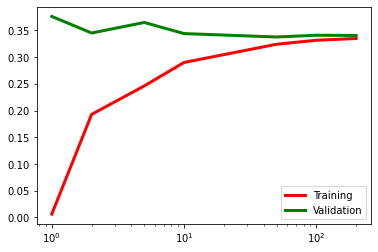

2086.07245016098


In [13]:
start = time.time()
K = [1,2,5,10,50,100,200] 
errTrain = np.zeros((len(K),))
errValue = np.zeros((len(K),))
for i,k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr,Ytr,k)
    Yhat = learner.predict(Xva)
    errTrain[i] = learner.err(Xtr, Ytr)
for i,k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr,Ytr,k)
    Yhat = learner.predict(Xva)
    errValue[i] = learner.err(Xva, Yva)
    
plt.semilogx(K, errTrain, "r-", lw=3, label = "Training") # red is train, green for validation
plt.semilogx(K, errValue, "g-", lw=3, label = "Validation")
plt.legend()
plt.show()
end = time.time()
print(end - start)

In [19]:
learner = ml.knn.knnClassify(X, Y, 3)
# Xte = np.genfromtxt('X_test.txt', delimiter=None)
# Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
# np.savetxt('Knn_Submit.txt',Yte,'%d, %.2f',header='ID,Prob1',comments='',delimiter=',')

In [20]:
print(learner)

knn classifier, 2 classes, K=3


In [21]:
Xte = np.genfromtxt('X_test.txt', delimiter=None)
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
np.savetxt('Knn_Submit.txt',Yte,'%d, %.2f',header='ID,Prob1',comments='',delimiter=',')